# Approach One - Based on the Bokk "Hands-On Transef Learning"

In [63]:
import pandas as pd
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import librosa
import librosa.display
import IPython.display
import soundfile as sf
import glob
import random

# define the path relative to the notebook source
# expected data structure
# -----------------------------------------------
# project root
#  src
#    main.ipynb
#  data
#   original
#     audio
#       fold1
#         *.wav
#       fold2,
#         *.wav
#     metadata
#      UrbanSound8K.csv

DATA_PATH = "../data/original/"
META_FILE = "{0}{1}".format(DATA_PATH,"metadata/UrbanSound8k.csv")
# Read the metadata
metaData = pd.read_csv(META_FILE,sep = ',',header=0,names=['FileName','fsID','start','end','salience','fold',
    'ClassID', 'Class'], usecols=[0,6,7])

# grab the full paths of all sample files
paths = glob.glob("{0}/audio/**/*".format(DATA_PATH))
# create a dataframe
sounds = [] 
for path in paths:
    fn = os.path.basename(path)
    meta = metaData[metaData.FileName == fn]
    audio = sf.SoundFile(path)
    sounds.append((meta.ClassID.values[0] , meta.Class.values[0],meta.FileName.values[0], audio.channels, 
        audio.samplerate,audio.frames,audio.format, round(audio.frames/audio.samplerate,1),
        audio.subtype,path))
df = pd.DataFrame(sounds,columns=['ClassID','Class','FileName','Channels','SampleRate','Frames','Format',
                                  'Length','SubType','Path'])
df.head(20)

,ClassID,Class,FileName,Channels,SampleRate,Frames,Format,Length,SubType,Path
0,3,dog_bark,101415-3-0-2.wav,1,48000,192000,WAV,4.0,PCM_16,../data/original//audio\fold1\101415-3-0-2.wav
1,3,dog_bark,101415-3-0-3.wav,1,48000,192000,WAV,4.0,PCM_16,../data/original//audio\fold1\101415-3-0-3.wav
2,3,dog_bark,101415-3-0-8.wav,1,48000,192000,WAV,4.0,PCM_16,../data/original//audio\fold1\101415-3-0-8.wav
3,3,dog_bark,102106-3-0-0.wav,2,44100,72324,WAV,1.6,PCM_16,../data/original//audio\fold1\102106-3-0-0.wav
4,6,gun_shot,102305-6-0-0.wav,2,44100,115101,WAV,2.6,PCM_16,../data/original//audio\fold1\102305-6-0-0.wav
5,3,dog_bark,102842-3-0-1.wav,2,44100,176400,WAV,4.0,PCM_16,../data/original//audio\fold1\102842-3-0-1.wav
6,3,dog_bark,102842-3-1-0.wav,2,44100,176400,WAV,4.0,PCM_16,../data/original//audio\fold1\102842-3-1-0.wav
7,3,dog_bark,102842-3-1-5.wav,2,44100,176400,WAV,4.0,PCM_16,../data/original//audio\fold1\102842-3-1-5.wav
8,3,dog_bark,102842-3-1-6.wav,2,44100,176400,WAV,4.0,PCM_16,../data/original//audio\fold1\102842-3-1-6.wav
9,7,jackhammer,103074-7-0-0.wav,2,48000,192000,WAVEX,4.0,PCM_24,../data/original//audio\fold1\103074-7-0-0.wav


In [2]:
sampleDf=df.groupby('Class',as_index = False,group_keys=False).apply(lambda s: s.sample(1,replace=True))
sampleDf.head(10)


,ClassID,Class,FileName,Channels,SampleRate,Frames,Format,Length,SubType,Path
3187,0,air_conditioner,30204-0-0-8.wav,2,44100,176400,WAV,4.0,PCM_16,../data/original//audio\fold3\30204-0-0-8.wav
2395,1,car_horn,58202-1-0-0.wav,2,44100,64185,WAV,1.5,PCM_16,../data/original//audio\fold2\58202-1-0-0.wav
4816,2,children_playing,162318-2-0-34.wav,2,96000,384000,WAVEX,4.0,PCM_24,../data/original//audio\fold5\162318-2-0-34.wav
8701,3,dog_bark,85664-3-0-0.wav,2,44100,28665,WAV,0.7,PCM_16,../data/original//audio\fold9\85664-3-0-0.wav
1700,4,drilling,99192-4-0-41.wav,1,44100,176400,WAV,4.0,PCM_16,../data/original//audio\fold10\99192-4-0-41.wav
2223,5,engine_idling,201652-5-4-1.wav,2,48000,192000,WAVEX,4.0,PCM_24,../data/original//audio\fold2\201652-5-4-1.wav
7423,6,gun_shot,162433-6-3-0.wav,2,96000,44160,WAVEX,0.5,PCM_24,../data/original//audio\fold8\162433-6-3-0.wav
5591,7,jackhammer,131918-7-0-3.wav,1,44100,176400,WAV,4.0,PCM_16,../data/original//audio\fold6\131918-7-0-3.wav
4844,8,siren,164782-8-0-0.wav,1,48000,192000,WAV,4.0,PCM_16,../data/original//audio\fold5\164782-8-0-0.wav
8271,9,street_music,168906-9-0-95.wav,2,48000,192000,WAV,4.0,PCM_16,../data/original//audio\fold9\168906-9-0-95.wav


In [64]:
# function to get start and end indices for audio sub-sample
def windows(data, window_size):
 start = 0
 while start < len(data):
  yield int(start), int(start + window_size)
  start += (window_size / 2)

In [65]:
data =[1,2,3,4,5,6]
wg = windows(data,2)
for i in wg:
    print(i)

(0, 2)
(1, 3)
(2, 4)
(3, 5)
(4, 6)
(5, 7)


In [ ]:
p = sampleDf.Path.values[0]
sample, r = sf.read(p)
y = librosa.resample(sample.T, r, 22050)
y = librosa.to_mono(y)
mel_spec = librosa.feature.melspectrogram(y=y)
np.info(mel_spec)
_ = librosa.display.specshow(librosa.power_to_db(mel_spec, ref=np.max), y_axis='mel', x_axis='time')
plt.show()
IPython.display.Audio(p)

class:  ndarray
shape:  (128, 28)
strides:  (224, 8)
itemsize:  8
aligned:  True
contiguous:  True
fortran:  False
data pointer: 0x25186a97040
byteorder:  little
byteswap:  False
type: float64


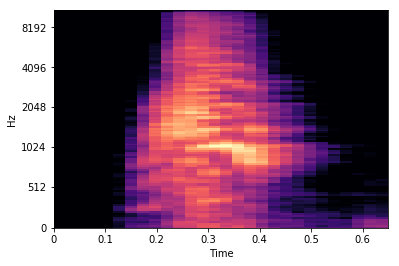

In [59]:
p2 = sampleDf.Path.values[3]
sample2, r2 = sf.read(p2)
y2 = librosa.resample(sample2.T, r2, 22050)
y2 = librosa.to_mono(y2)
mel_spec2 = librosa.feature.melspectrogram(y=y2)
np.info(mel_spec2)
p = librosa.display.specshow(librosa.power_to_db(mel_spec2, ref=np.max), y_axis='mel', x_axis='time')
plt.show()
IPython.display.Audio(p2)